In [12]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [8]:
df.head()
x = df[['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']]
y = df[['default']]

In [10]:
import pandas as pd

# Combine features and target
data = pd.concat([x, y], axis=1)

# Compute correlations with default
correlations = data.corr()['default'].drop('default').sort_values(key=abs, ascending=False)

print("Correlation with default:\n", correlations)


Correlation with default:
 credit_lines_outstanding    0.862815
total_debt_outstanding      0.758868
fico_score                 -0.324515
years_employed             -0.284506
loan_amt_outstanding        0.098978
income                      0.016309
Name: default, dtype: float64


Confusion Matrix:
 [[2458    1]
 [   9  532]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2459
           1       1.00      0.98      0.99       541

    accuracy                           1.00      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000



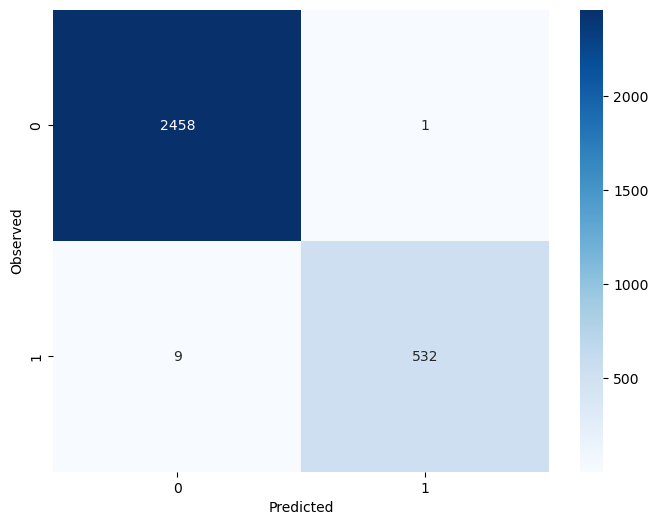

In [16]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y.values.ravel(), test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.show()

In [17]:
features = x.columns
coef = model.coef_[0]
coef_df = pd.DataFrame({'Features': features, 'Coefs': coef})
coef_df.sort_values(by = 'Coefs', ascending = False)

,Features,Coefs
0,credit_lines_outstanding,8.518931
2,total_debt_outstanding,3.685591
1,loan_amt_outstanding,0.145166
5,fico_score,-1.175821
3,income,-2.315660
4,years_employed,-2.768698
